In [7]:
# importing libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# reading Excel file
Headcount = pd.read_excel('Demandv1.1.xlsx', 'Headcount',header=0)
Demand_LY = pd.read_excel('Demandv1.1.xlsx', 'Demand Trend Last year',header=0)

In [9]:
num_col = ['No. of FTE Request Raised']
cat_col = ['Month DD Raised','SkillList','Location','Experience Grade', 
           'Practice', 'Skill Group', 'Demand Source']

In [10]:
Demand_LY.columns

Index(['Month DD Raised', 'No. of FTE Request Raised', 'SkillList', 'Location',
       'Experience Grade', 'Practice', 'Skill Group', 'Demand Source'],
      dtype='object')

In [11]:
############################################
#                                          #
#     2.1 Exploratory Data Analysis        #
#                                          #
############################################

###################################
#  2.1.1 understanding the data   #
###################################
#Checking few observation of dataset
Demand_LY.head()

,Month DD Raised,No. of FTE Request Raised,SkillList,Location,Experience Grade,Practice,Skill Group,Demand Source
0,May,4,Salesforce (Functional),Bangalore,A4,BANK,(F) IT Operations,Account
1,October,2,"Amazon Web services - Build , Administration a...",Bhubaneswar,B2,M&FT,(F) IT Operations,Account
2,March,2,"Amazon Web services - Build , Administration a...",Pune,A3,TEST,NaN,Support
3,October,1,Test Automation,Bhubaneswar,B2,M&FT,(F) IT Operations,Account
4,June,2,PMO (Account),Noida,A5,I&D,(D) Banking Sector,Proactive


In [12]:
# looking at information of dataset -> see output
Demand_LY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 8 columns):
Month DD Raised              1023 non-null object
No. of FTE Request Raised    1023 non-null int64
SkillList                    1023 non-null object
Location                     1023 non-null object
Experience Grade             1023 non-null object
Practice                     1023 non-null object
Skill Group                  981 non-null object
Demand Source                1023 non-null object
dtypes: int64(1), object(7)
memory usage: 64.0+ KB


In [13]:
Demand_LY.columns

Index(['Month DD Raised', 'No. of FTE Request Raised', 'SkillList', 'Location',
       'Experience Grade', 'Practice', 'Skill Group', 'Demand Source'],
      dtype='object')

In [14]:
# looking at five point summary for our numerical variables
Demand_LY.describe()

,No. of FTE Request Raised
count,1023.000000
mean,2.482893
std,1.118012
min,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,4.000000


In [15]:
# Counting of each unique values in each categorical variable
print("Value counts of Categorical Columns")
print()
for i in cat_col :
    print('## {} ## :- '.format(i))
    print(Demand_LY[i].value_counts())
    print()

Value counts of Categorical Columns

## Month DD Raised ## :- 
March       196
October     188
August      162
June        150
January      90
December     87
February     86
May          64
Name: Month DD Raised, dtype: int64

## SkillList ## :- 
Java                                                                                                                          71
Ab Initio                                                                                                                     50
Business Analytics,Cards Issuing                                                                                              28
MS/Windows Dev OPS                                                                                                            27
Angular.js                                                                                                                    26
Spring Batch,Hibernate,Spring,Java (Multi Skilled),Java                                                    

In [30]:
# Comparing observations for identyfying any type of trend in missing 'Skill Group' values
temp = pd.DataFrame(Demand_LY[Demand_LY['Skill Group'].isnull()])
temp.pivot_table(index='SkillList', columns='Practice',
                    aggfunc={'Practice':'count'})

Practice                  \
Practice                                                ADM BANK  CFS Cards   
SkillList                                                                     
API Integrations- REST, SOAP , Powershell,Fatwire       NaN  NaN  1.0   NaN   
Ab Initio                                               2.0  NaN  NaN   NaN   
Amazon Web services - Build , Administration an...      NaN  NaN  NaN   NaN   
Angular.js                                              1.0  NaN  NaN   1.0   
BPM                                                     NaN  NaN  NaN   NaN   
Core Java,Java                                          NaN  NaN  NaN   NaN   
ETL,Ab Initio                                           NaN  NaN  NaN   NaN   
Guidewire                                               NaN  NaN  1.0   NaN   
Guidewire PolicyCenter                                  NaN  NaN  NaN   NaN   
HP Exstream                                             NaN  NaN  1.0   NaN   
J2EE,Spring,Hibernate,Agile                             NaN  NaN  NaN   NaN   
JEE,Java (Multi Skilled),Java                           NaN  NaN  NaN   NaN   
Java                                                    NaN  NaN  NaN   NaN   
Java,API Integrations- REST, SOAP , Powershell          NaN  NaN  NaN   1.0   
Java,PYTHON,Jenkins,GIT,PowerShell ( Server Adm...      NaN  NaN  NaN   NaN   
Java,Selenium,Cucumber, Behat,C#,CSS,Test Autom...      NaN  NaN  NaN   NaN   
MS/Windows Dev OPS                                      NaN  1.0  NaN   NaN   
Mendix                                                  NaN  NaN  NaN   NaN   
POSTGRESQL                                              1.0  NaN  NaN   NaN   
SQL                                                     NaN  NaN  NaN   NaN   
Selenium                                                NaN  NaN  NaN   NaN   
Spring Batch,Hibernate,Spring,Java (Multi Skill...      NaN  1.0  NaN   NaN   
Temenos                                                 NaN  NaN  NaN   NaN   
Test Automation                                         NaN  1.0  1.0   NaN   
Test Environment Management                             NaN  1.0  NaN   NaN   
Testing Manual                                          NaN  NaN  NaN   NaN   
Testing Manual,Banking,Test Automation                  NaN  NaN  NaN   NaN   
Thunderhead                                             NaN  NaN  NaN   NaN   
Vision Plus,V+                                          NaN  NaN  NaN   NaN   

                                                                             \
Practice                                            DCX  ERP   GP  I&D  INS   
SkillList                                                                     
API Integrations- REST, SOAP , Powershell,Fatwire   NaN  NaN  NaN  NaN  NaN   
Ab Initio                                           NaN  NaN  NaN  NaN  NaN   
Amazon Web services - Build , Administration an...  NaN  NaN  NaN  NaN  1.0   
Angular.js                                          NaN  NaN  NaN  2.0  1.0   
BPM                                                 NaN  NaN  NaN  NaN  1.0   
Core Java,Java                                      1.0  NaN  NaN  NaN  NaN   
ETL,Ab Initio                                       1.0  NaN  NaN  NaN  NaN   
Guidewire                                           NaN  NaN  NaN  NaN  NaN   
Guidewire PolicyCenter                              NaN  NaN  NaN  NaN  NaN   
HP Exstream                                         NaN  NaN  NaN  NaN  NaN   
J2EE,Spring,Hibernate,Agile                         NaN  1.0  NaN  NaN  NaN   
JEE,Java (Multi Skilled),Java                       NaN  NaN  NaN  NaN  NaN   
Java                                                NaN  NaN  1.0  NaN  NaN   
Java,API Integrations- REST, SOAP , Powershell      NaN  NaN  NaN  NaN  NaN   
Java,PYTHON,Jenkins,GIT,PowerShell ( Server Adm...  NaN  NaN  NaN  NaN  NaN   
Java,Selenium,Cucumber, Behat,C#,CSS,Test Autom...  NaN  NaN  NaN  NaN  NaN   
MS/Windows Dev OPS   

In [40]:
temp.sort_values('Practice', ascending = True)

,Month DD Raised,No. of FTE Request Raised,SkillList,Location,Experience Grade,Practice,Skill Group,Demand Source
989,June,3,Angular.js,Noida,A5,ADM,NaN,Support
979,June,3,Ab Initio,Noida,A5,ADM,NaN,Proactive
10,June,2,POSTGRESQL,Noida,A5,ADM,NaN,Support
269,June,3,Ab Initio,Noida,A5,ADM,NaN,Account
1004,May,1,"Spring Batch,Hibernate,Spring,Java (Multi Skil...",Bangalore,A4,BANK,NaN,Proactive
37,May,2,MS/Windows Dev OPS,Bangalore,A4,BANK,NaN,Account
494,May,2,Test Automation,Bangalore,A4,BANK,NaN,Proactive
101,May,3,Test Environment Management,Bangalore,A4,BANK,NaN,Proactive
731,February,1,HP Exstream,Hyderabad,A2,CFS,NaN,Account
729,February,3,Guidewire,Hyderabad,A2,CFS,NaN,Account


In [48]:
Demand_LY[Demand_LY['Practice'] == 'ADM'].sort_values(['SkillList','Demand Source'], ascending = True)

,Month DD Raised,No. of FTE Request Raised,SkillList,Location,Experience Grade,Practice,Skill Group,Demand Source
898,June,1,"(D) Capital Markets Sector,Financial Services",Noida,A5,ADM,(T) Java Development Technologies,Account
562,June,1,.Net (WF),Noida,A5,ADM,(D) Cards,Proactive
269,June,3,Ab Initio,Noida,A5,ADM,NaN,Account
506,June,4,Ab Initio,Noida,A5,ADM,(D) Banking Sector,Account
517,June,4,Ab Initio,Noida,A5,ADM,(T) Card packages,Account
624,June,1,Ab Initio,Noida,A5,ADM,(D) Capital Markets Sector,Account
856,June,1,Ab Initio,Noida,A5,ADM,(D) Capital Markets Sector,Account
979,June,3,Ab Initio,Noida,A5,ADM,NaN,Proactive
287,June,1,Actimize,Noida,A5,ADM,(D) Insurance Sector,Proactive
921,June,2,Adobe,Noida,A5,ADM,(T) Monitoring Technologies,Proactive


In [49]:
Demand_LY[Demand_LY['Practice'] == 'BANK'].sort_values(['SkillList','Demand Source'], 
                                                       ascending = True)

,Month DD Raised,No. of FTE Request Raised,SkillList,Location,Experience Grade,Practice,Skill Group,Demand Source
906,May,1,(D) Capital Markets Sector,Bangalore,A4,BANK,(T) Web Development Technologies,Support
404,May,1,"API Integrations- REST, SOAP , Powershell",Bangalore,A4,BANK,(T) Enterprise Service Bus (ESB),Account
183,May,1,Ab Initio,Bangalore,A4,BANK,(D) Cards,Account
239,May,4,Ab Initio,Bangalore,A4,BANK,(F) IT Operations,Proactive
515,May,1,Ab Initio,Bangalore,A4,BANK,(T) Mainframe Development Technologies,Proactive
821,May,2,"Agile,ETL,AWS Redshift,PYTHON",Bangalore,A4,BANK,(T) Enterprise Content Management (ECM),Proactive
754,May,2,"Amazon Web services - Build , Administration a...",Bangalore,A4,BANK,(T) Mainframe Development Technologies,Proactive
762,May,3,"Amazon Web services - Build , Administration a...",Bangalore,A4,BANK,(F) Commercial and Contract Management,Support
579,May,4,"Business Analytics,Cards Issuing",Bangalore,A4,BANK,(D) Capital Markets Sector,Account
69,May,2,CRM - Salesforce.com,Bangalore,A4,BANK,(T) Mainframe Development Technologies,Proactive


In [50]:
###################################
#  2.1.2 Missing value analysis   #
###################################
    
# checking for missing values in dataset
for i in Demand_LY.columns :
    print(i, Demand_LY[i].isnull().sum())  

Month DD Raised 0
No. of FTE Request Raised 0
SkillList 0
Location 0
Experience Grade 0
Practice 0
Skill Group 42
Demand Source 0


In [14]:
###################################
### 2.1.3 Visualising Data        #
###################################

In [94]:
# Convert Month to numeral for ordering
rule = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8,
       'September':9, 'October':10, 'November':11, 'December':12}
Demand_LY['Month'] = Demand_LY['Month DD Raised']
Demand_LY['Month'] = Demand_LY['Month'].replace(rule)

"plt.subplot(grid[0,2])\nplt.hist(Demand_LY['SkillList'], alpha = 1, edgecolor = 'black')\nplt.ylabel('Count')\nplt.xlabel('SkillList')"

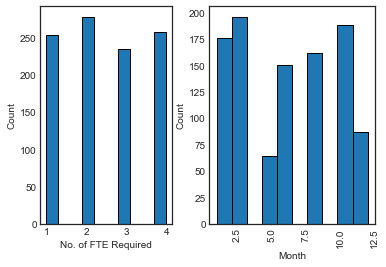

In [121]:
grid = plt.GridSpec(1,10, wspace = 0.1, hspace = 0.1)
plt.subplot(grid[0,0:4])
plt.hist(Demand_LY['No. of FTE Request Raised'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count')
plt.xlabel('No. of FTE Required')

plt.subplot(grid[0,5:])
plt.hist(Demand_LY['Month'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count')
plt.xlabel('Month')
plt.xticks(rotation=90)

'''plt.subplot(grid[0,2])
plt.hist(Demand_LY['SkillList'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count')
plt.xlabel('SkillList')'''

Text(0.5,0,'Demand Source')

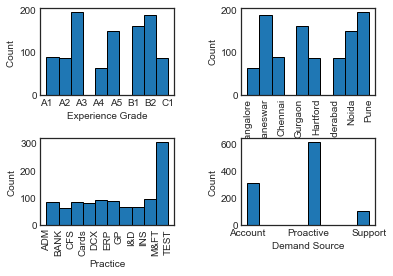

In [151]:
# Histogram
grid = plt.GridSpec(2,2, wspace = 0.5, hspace = 0.5)
plt.subplot(grid[0,0])
plt.hist(Demand_LY['Experience Grade'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count ')
plt.xlabel('Experience Grade')

plt.subplot(grid[0,1])
plt.hist(Demand_LY['Location'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count')
plt.xlabel('Location')
plt.xticks(rotation=90)

plt.subplot(grid[1,0])
plt.hist(Demand_LY['Practice'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count')
plt.xlabel('Practice')
plt.xticks(rotation=90)

'''plt.subplot(grid[1,5:])
plt.hist(Demand_LY['Skill Group'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count')
plt.xlabel('Skill Group')'''

plt.subplot(grid[1,1])
plt.hist(Demand_LY['Demand Source'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count')
plt.xlabel('Demand Source')

Text(0,0.5,'No. of FTE Request Raised')

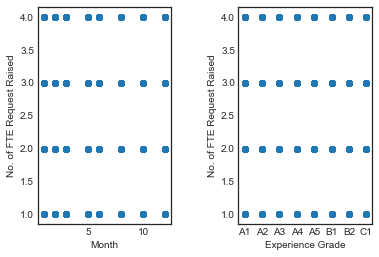

In [124]:
# Scatter Plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-white')
grid = plt.GridSpec(1,2, wspace = 0.5, hspace = 0.5)

plt.subplot(grid[0,0])
plt.plot(Demand_LY['Month'],Demand_LY['No. of FTE Request Raised'],'o')
plt.xlabel('Month')
plt.ylabel('No. of FTE Request Raised')

plt.subplot(grid[0,1])
plt.plot(Demand_LY['Experience Grade'],Demand_LY['No. of FTE Request Raised'],'o')
plt.xlabel('Experience Grade')
plt.ylabel('No. of FTE Request Raised')

Text(0,0.5,'Skill Group')

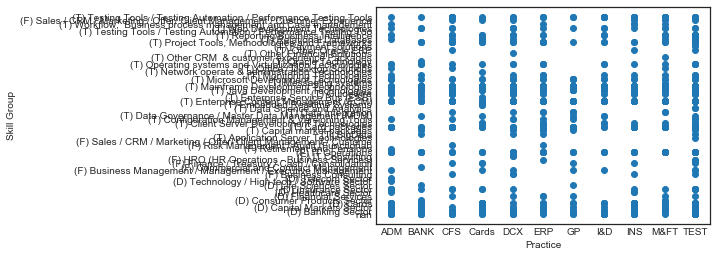

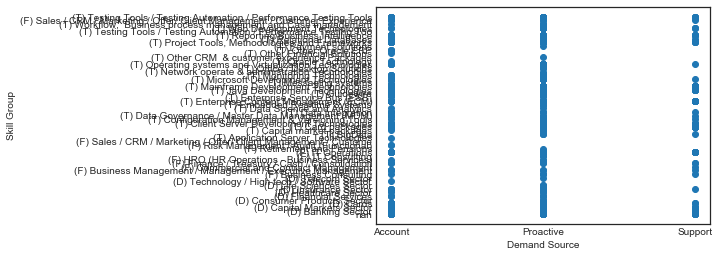

In [127]:
plt.figure()
plt.plot(Demand_LY['Practice'],Demand_LY['Skill Group'],'o')
plt.xlabel('Practice')
plt.ylabel('Skill Group')

plt.figure()
plt.plot(Demand_LY['Demand Source'],Demand_LY['Skill Group'],'o')
plt.xlabel('Demand Source')
plt.ylabel('Skill Group')

In [ ]:
plt.figure()
plt.plot(Demand_LY['Location'],Demand_LY['Skill Group'],'o')
plt.xlabel('Demand Source')
plt.ylabel('Skill Group')

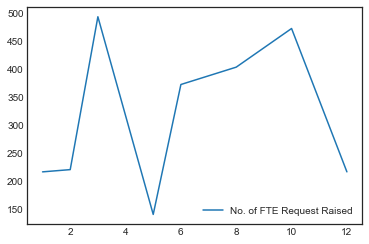

In [128]:
# Line Chart
d = Demand_LY.pivot_table(index='Month',aggfunc={'No. of FTE Request Raised':sum})
d = d.reset_index()
plt.plot(d['Month'],d['No. of FTE Request Raised'])
plt.legend()
plt.xlabel('Month')
plt.ylabel('No. of FTE Request Raised')

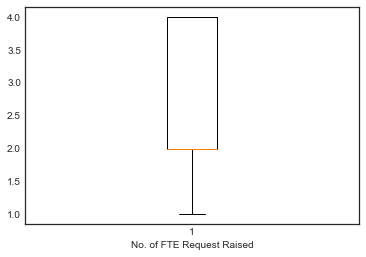

In [130]:
# Boxplot for Outlier Analysis
num_var = ['No. of FTE Request Raised']
for i in num_var:
    plt.figure()
    plt.boxplot(Demand_LY[i])
    plt.xlabel(i)

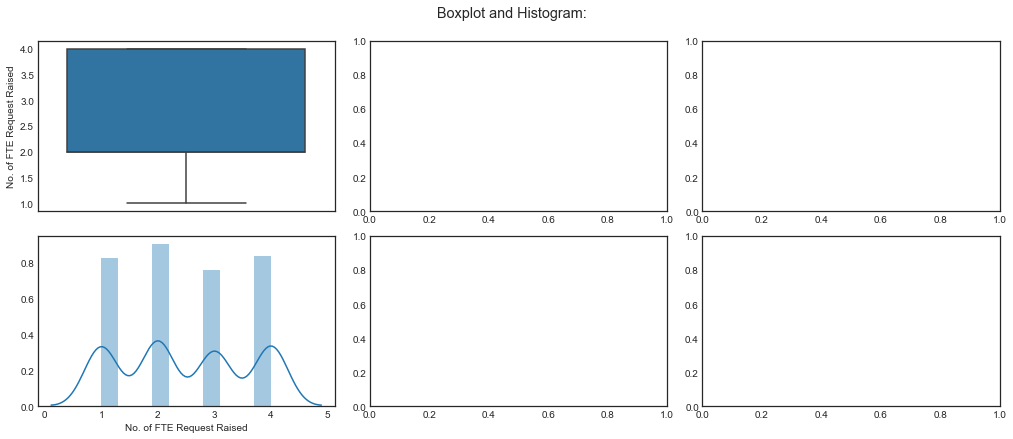

In [145]:
###################################
#  2.1.4 outlier analysis         #
###################################
###################################
# user defined function that will plot boxplot and histogram for four columns
def hist_and_box_plot(col1, data, bin1=30, sup =""):
    fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize= (14,6))
    super_title = fig.suptitle("Boxplot and Histogram: "+sup,fontsize='x-large')
    plt.tight_layout()
    sns.boxplot(y = col1, data = data, ax = ax[0][0])
    sns.distplot(data[col1], ax = ax[1][0], bins = bin1)
    fig.subplots_adjust(top = 0.90)
    plt.show()
# plotting boxplot and histogram for our numerical variables
hist_and_box_plot('No. of FTE Request Raised', bin1 = 10, data = Demand_LY)

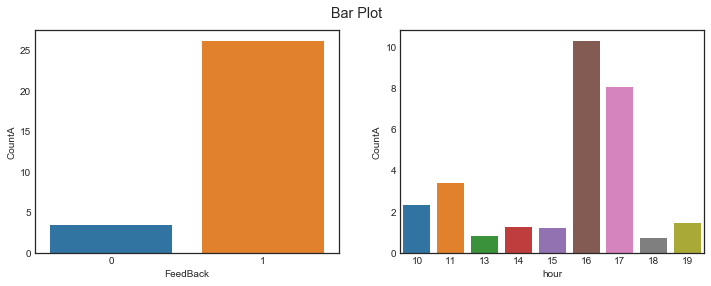

In [26]:
###################################
#  2.1.4 Feature Engineering      #
###################################

from datetime import datetime
SampleData['hour'] = temp1['Date'].dt.hour

# user defined function to plot bar plot of a column for each y i.e. y1 and y2 wrt 
# unique variables of each x i.e. x1 and x2
# X1 and X2 would be categorical variable, y1 and y2 would be continuous
# this funciton will plot barplot for y1 column for each unique values of x1 and 
# will do barplot for y2 for each unique values of x2 and method could be mean,sum etc.
def plot_bar(x1, y1,x2, y2, method = 'sum'):
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize= (12,4), squeeze=False)
    super_title = fig.suptitle("Bar Plot ",  fontsize='x-large')
    if(method == 'mean'):
        gp = SampleData.groupby(by = x1).mean()
        gp2 = SampleData.groupby(by = x2).mean()
    else:
        gp = SampleData.groupby(by = x1).sum()
        gp2 = SampleData.groupby(by = x2).sum()
    gp = gp.reset_index()
    gp2 = gp2.reset_index()
    sns.barplot(x= x1, y = y1, data = gp, ax=ax[0][0])
    sns.barplot(x= x2, y = y2, data = gp2, ax=ax[0][1])
    fig.subplots_adjust(top = 0.90)
    plt.show()
	

# plotting barplot for count i.e. cnt wrt to yr and month
plot_bar('FeedBack', 'CountA', 'hour', 'CountA')

In [27]:
# Creating categorical variable time_of_day from hour data variable
for i in range(SampleData.shape[0]):
    if SampleData.ix[i,'hour'] < 12 :
        SampleData.ix[i,'time_of_day'] = 'Morning'
    elif SampleData.ix[i,'hour'] <= 17 :
        SampleData.ix[i,'time_of_day'] = 'Afternoon'
    else :
        SampleData.ix[i,'time_of_day'] = 'Night'

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,'time_of_day')

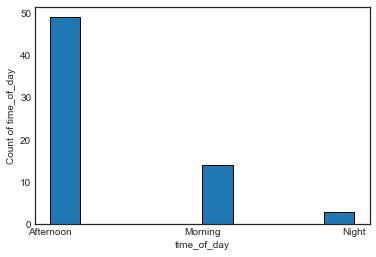

In [28]:
plt.figure()
plt.hist(SampleData['time_of_day'], alpha = 1, edgecolor = 'black')
plt.ylabel('Count of time_of_day')
plt.xlabel('time_of_day')

In [29]:
SampleData.loc[:,'time_of_day'] = pd.Categorical(SampleData.loc[:,'time_of_day'])
SampleData.loc[:,'time_of_day'] = SampleData.loc[:,'time_of_day'].cat.codes

In [30]:
# Dummy Variable Creation
num_var = ['CountA','CountB', 'CountC','hour']
cat_var = ['Type'] # Dropped as per chi-sq test ['User','time_of_day'] 
df1 = SampleData.applymap(int)
for i in cat_var:
    df1[i].astype('str')
temp1 = pd.DataFrame(df1['FeedBack'])
temp1 = temp1.join(SampleData[num_var])
for i in cat_var:
    d = pd.get_dummies(df1[i],prefix = i)
    temp1 = temp1.join(d)
data_hotencod = temp1
data_hotencod.shape,data_hotencod.columns

((66, 8),
 Index(['FeedBack', 'CountA', 'CountB', 'CountC', 'hour', 'Type_0', 'Type_1',
        'Type_2'],
       dtype='object'))

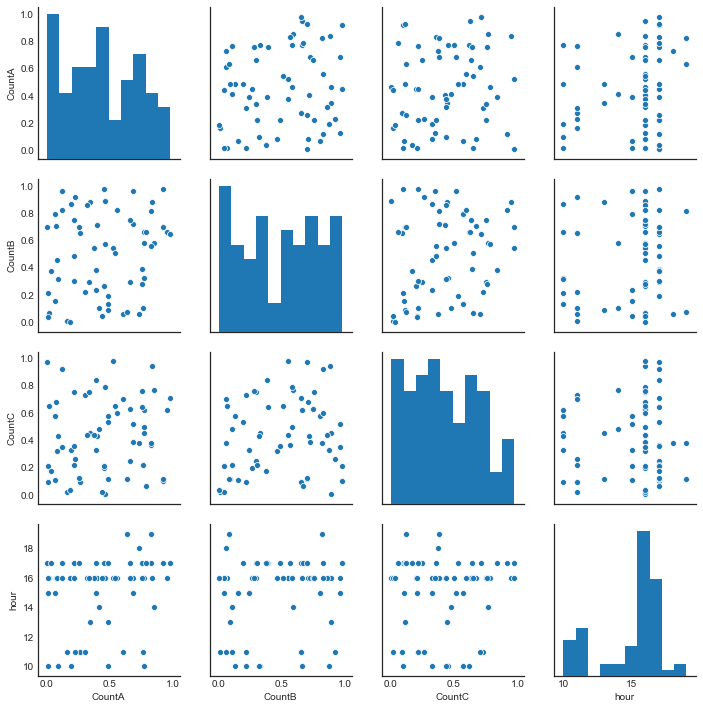

In [31]:
# let us look at correlation plot for each numerical variables  
num_var = ['CountA','CountB','CountC','hour']
sns.pairplot(data_hotencod[num_var])

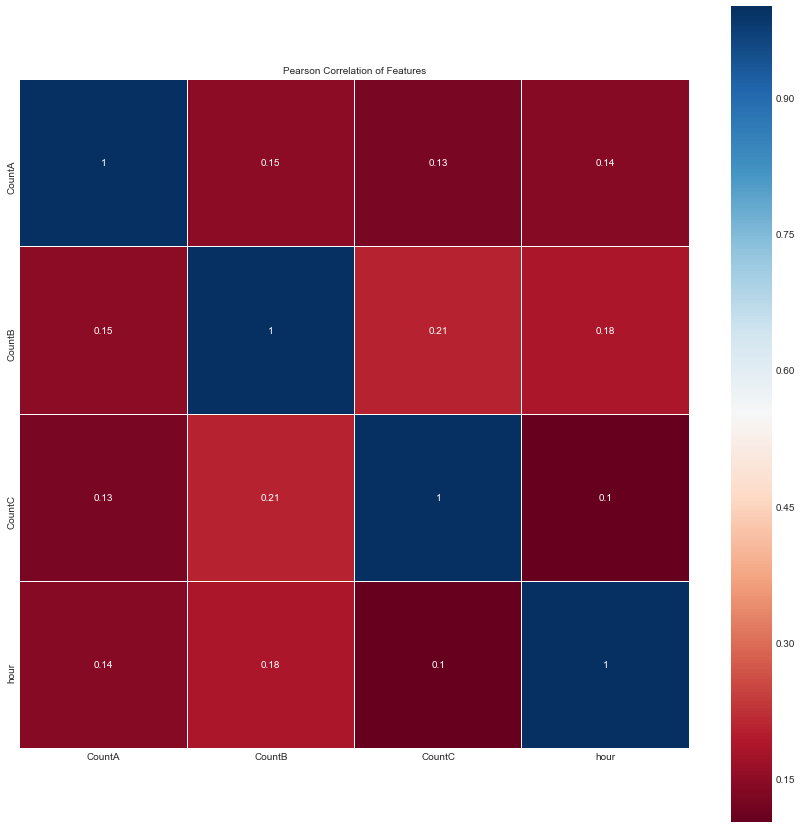

In [32]:
#correlation plot
num_var = ['CountA','CountB','CountC','hour']
data_corr = SampleData.loc[:,num_var]
#f,ax = plt.subplots(figsize = (7,5))
corr = data_corr.corr()

colormap = plt.cm.RdBu
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.0, size=10)
sns.heatmap(data_corr.corr(),linewidths=0.2,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [33]:
# checking dependency between FeedBack and independent variable (category)
cat_var = ['Type','User','time_of_day']
from scipy.stats import chi2_contingency
print("Chi-square - test of independence")
print("=================================")
for i in cat_var:
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(SampleData['FeedBack'], SampleData[i]))
    print("p-value between FeedBack and {}".format(i))
    print(p)
    print('----------------------------')

Chi-square - test of independence
p-value between FeedBack and Type
1.4357170403764882e-06
----------------------------
p-value between FeedBack and User
0.9621643388283516
----------------------------
p-value between FeedBack and time_of_day
0.32487339451373193
----------------------------


In [34]:
# checking independency between independent variables
chi2, p, dof, ex = chi2_contingency(pd.crosstab(SampleData['Type'],
                                                SampleData['User']))
print("p-value between 'Type' and 'User'")
print(p)
print('----------------------------')

# checking independency between independent variables
chi2, p, dof, ex = chi2_contingency(pd.crosstab(SampleData['Type'],
                                               SampleData['time_of_day']))
print("p-value between 'Type'  and 'time_of_day'")
print(p)
print('----------------------------')

# checking independency between independent variables
chi2, p, dof, ex = chi2_contingency(pd.crosstab(SampleData['User'],
                                               SampleData['time_of_day']))
print("p-value between 'User'  and 'time_of_day'")
print(p)
print('----------------------------')

p-value between 'Type' and 'User'
0.19069180044021652
----------------------------
p-value between 'Type'  and 'time_of_day'
0.6602313428432385
----------------------------
p-value between 'User'  and 'time_of_day'
2.900514047022734e-05
----------------------------


In [35]:
# checking importance of feature
drop_col = ['User','time_of_day','FeedBack']
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=200)
X = SampleData.drop(columns= drop_col)
y = SampleData['FeedBack']
clf.fit(X, y)
imp_feat = pd.DataFrame({'Feature': SampleData.drop(columns=drop_col).columns,
                         'importance':clf.feature_importances_})
imp_feat.sort_values(by = 'importance', ascending=False).reset_index(drop = True)


,Feature,importance
0,Type,0.434280
1,CountA,0.179720
2,CountB,0.139154
3,CountC,0.124393
4,hour,0.122454


In [36]:
# Checking VIF values of numeric columns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf
from statsmodels.tools.tools import add_constant
numeric_df = add_constant(SampleData[num_var])
vif = pd.Series([vf(numeric_df.values, i) for i in range(numeric_df.shape[1])], 
                 index = numeric_df.columns)
vif.round(1) 

const     37.9
CountA     1.0
CountB     1.1
CountC     1.1
hour       1.1
dtype: float64

In [37]:
'''
# Feature Scaling
# Not Requireed_see explanation in Report
for i in num_var:
   data_hotencod[i]  = (data_hotencod[i] - min(data_hotencod[i]))/(max(data_hotencod[i]) - min(data_hotencod[i]))
'''

'\n# Feature Scaling\n# Not Requireed_see explanation in Report\nfor i in num_var:\n   data_hotencod[i]  = (data_hotencod[i] - min(data_hotencod[i]))/(max(data_hotencod[i]) - min(data_hotencod[i]))\n'

In [38]:
# splitting in X and y for train and test
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_hotencod.iloc[:,1:8],data_hotencod.iloc[:,0], test_size=0.2,
                                                    random_state=42)

In [39]:
############################################
#                                          #
#                                          #
#   2.2.2 Building Classification models   #
#                                          #
#                                          #
############################################

# making general function to fit and predict result (Confusion Matrix) 
# and performance (K-fold CV) and to not to repeat code everytime
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
def fit_predict_show_performance(classifier, X_train, y_train):
    '''
    this function will fit on data passed in argument then it will predict on
    X_test datasetand then will calculate the 10 fold CV accuracy score and then will 
    generate classification report and confusion matrix based on prediction and y_test
    it will only print result, to get all calculated result, uncomment last line and 
    call it like below example:
    y_pred, cr, cm = fit_predict_show_performance(classifier, X_train, y_train)
    '''
    # fitting model
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    # getting K-fold CV scores for K = 10
    ten_performances = cross_val_score(estimator=classifier,X=X_train,y=y_train,cv=10)
    k_fold_performance = ten_performances.mean()
    print("K-fold cross validation score of model for k = 10 is :")
    print(k_fold_performance)
    print("====================================")
    print("====== Classification Report ======= ")
    cr = classification_report(y_test,prediction)
    print(cr)
    print("====== Confusion matrix ======= ")
    cm = confusion_matrix(y_test,prediction)
    print(cm)
    #return [prediction, cr, cm]


In [40]:
#########################
#  Logistic Regression  #
#########################
    
# Building Logistic Regression-> see output
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
fit_predict_show_performance(classifier, X_train, y_train)

K-fold cross validation score of model for k = 10 is :
0.9166666666666667
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.93      1.00      0.96        13

avg / total       0.86      0.93      0.89        14

====== Confusion matrix ======= 
[[ 0  1]
 [ 0 13]]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
#########################
#       KNN             #
#########################
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p =2)
fit_predict_show_performance(classifier, X_train, y_train)

K-fold cross validation score of model for k = 10 is :
0.9016666666666667
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.92      0.85      0.88        13

avg / total       0.85      0.79      0.82        14

====== Confusion matrix ======= 
[[ 0  1]
 [ 2 11]]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [42]:
#########################
#     Naive Bayes       #
#########################-> see output
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
fit_predict_show_performance(classifier, X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


K-fold cross validation score of model for k = 10 is :
0.9183333333333333
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.20      1.00      0.33         1
          1       1.00      0.69      0.82        13

avg / total       0.94      0.71      0.78        14

====== Confusion matrix ======= 
[[1 0]
 [4 9]]


In [43]:
#########################
#    Decision Tree      #
#########################-> see output
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
fit_predict_show_performance(classifier, X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


K-fold cross validation score of model for k = 10 is :
0.9216666666666666
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.33      1.00      0.50         1
          1       1.00      0.85      0.92        13

avg / total       0.95      0.86      0.89        14

====== Confusion matrix ======= 
[[ 1  0]
 [ 2 11]]


In [44]:
#########################
#    Random Forest      #
#########################-> see output
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                                          random_state=1)
fit_predict_show_performance(classifier, X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


K-fold cross validation score of model for k = 10 is :
0.925
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.33      1.00      0.50         1
          1       1.00      0.85      0.92        13

avg / total       0.95      0.86      0.89        14

====== Confusion matrix ======= 
[[ 1  0]
 [ 2 11]]


In [46]:
############################################
#                                          #
#                                          #
#        Hyperparameter tuning             #
#                                          #
#                                          #
############################################
#########################################
#                                       #
# tuning decision tree for dataset #
#                                       #
#########################################

# hyperparameter tuning for Decision tree classifier
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state=1)
params = [{'criterion':['entropy', 'gini'],
          'max_depth':[6,8,10,12,20],'class_weight':['balanced',{0:0.45, 1:0.55}, 
                      {0:0.55,1:0.45},{0:0.40,1:0.60}],'random_state' :[1]}]
grid_search = GridSearchCV(estimator=classifier, param_grid=params,
                          scoring = 'f1', cv = 10, n_jobs=-1)

# tuning Decision Tree for dataset-> see output
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'random_state': 1}

In [47]:
#Decision tree classifier
#from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', 
                                          class_weight='balanced',max_depth=6,
                                          random_state=1)
fit_predict_show_performance(classifier, X_train, y_train)

K-fold cross validation score of model for k = 10 is :
0.9383333333333332
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.90      0.69      0.78        13

avg / total       0.84      0.64      0.73        14

====== Confusion matrix ======= 
[[0 1]
 [4 9]]


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [48]:
############ Hyperparameter tuning for Random Forest #############
# Grid search for finding best parameter for random_forest 
classifier = RandomForestClassifier(random_state=1)
params=[{'criterion':['entropy', 'gini'],'n_estimators':[800,1000],
         'max_depth': [8, 10, 12], 'class_weight':['balanced', {0:0.45, 1:0.55},
                      {0:0.55, 1:0.45}],'random_state' :[1]}]
grid_search = GridSearchCV(estimator=classifier, param_grid=params,
                          scoring = 'f1', cv = 10, n_jobs=-1)
grid_search = grid_search.fit(X_train, y_train)
grid_search.best_params_

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 8,
 'n_estimators': 800,
 'random_state': 1}

In [49]:
# tuned randomforest model 
classifier = RandomForestClassifier(n_estimators = 800, criterion = 'entropy',
                                          class_weight='balanced',max_depth=8,
                                          random_state=1)
fit_predict_show_performance(classifier, X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


K-fold cross validation score of model for k = 10 is :
0.925
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.20      1.00      0.33         1
          1       1.00      0.69      0.82        13

avg / total       0.94      0.71      0.78        14

====== Confusion matrix ======= 
[[1 0]
 [4 9]]


In [50]:
############################################
#                                          #
#    SMOTE + Tomek (Oversampling)          #
#         Balancing Target                 #
#                                          #
############################################

# resmapling data 
from imblearn.combine import SMOTETomek
smt = SMOTETomek()
#X_resampled, y_resampled = smt.fit_sample((X_train), (y_train))
X_resampled, y_resampled = smt.fit_sample(data_hotencod.iloc[:,1:8], data_hotencod.iloc[:,0])

# checking shape of data after resampling
print(X_resampled.shape)
print(y_resampled.shape)
print("class proportion")
print(pd.Series(y_resampled).value_counts(normalize = True))

(118, 7)
(118,)
class proportion
1    0.5
0    0.5
dtype: float64


In [51]:
# tuning Random forest model for resampled data
classifier = RandomForestClassifier(random_state=1)
params = [{'criterion':['entropy','gini'],'n_estimators':[600, 800, 1000],
          'max_depth': [24, 26, 28], 'random_state' :[1],
          'class_weight':['balanced', {0:0.45, 1:0.55},{0:0.55, 1:0.45}]}]
grid_search = GridSearchCV(estimator=classifier, param_grid=params,
                          scoring = 'f1', cv = 10, n_jobs=-1)
grid_search = grid_search.fit(X_resampled, y_resampled)
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 24,
 'n_estimators': 600,
 'random_state': 1}

In [52]:
# building Random Forest model on tuned parameter
classifier = RandomForestClassifier(n_estimators = 600, criterion = 'entropy',
                                          class_weight='balanced',
                                          max_depth=24,random_state=1)
fit_predict_show_performance(classifier, X_resampled, y_resampled)

K-fold cross validation score of model for k = 10 is :
0.9833333333333332
====== Classification Report ======= 
             precision    recall  f1-score   support

          0       0.50      1.00      0.67         1
          1       1.00      0.92      0.96        13

avg / total       0.96      0.93      0.94        14

====== Confusion matrix ======= 
[[ 1  0]
 [ 1 12]]
